# 1. Install and Import Dependencies

In [2]:
pip install torch torchvision torchaudio

     ------------------------------------ 172.4/172.4 MB 870.3 kB/s eta 0:00:00
     ---------------------------------------- 1.2/1.2 MB 1.2 MB/s eta 0:00:00
  Using cached torchaudio-2.0.2-cp39-cp39-win_amd64.whl (2.1 MB)
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
neuralprophet 0.6.2 requires matplotlib<4.0.0,>=3.5.3, but you have matplotlib 3.5.2 which is incompatible.
neuralprophet 0.6.2 requires numpy<1.24.0,>=1.21.6, but you have numpy 1.21.5 which is incompatible.
neuralprophet 0.6.2 requires tensorboard<3.0.0,>=2.11.2, but you have tensorboard 2.11.0 which is incompatible.
neuralprophet 0.6.2 requires torch<2.0.0,>=1.13.1, but you have torch 2.0.1 which is incompatible.
neuralprophet 0.6.2 requires typing-extensions<5.0.0,>=4.5.0, but you have typing-extensions 4.3.0 which is incompatible.


In [6]:
!cd yolov5 & pip install -r requirements.txt

  Using cached thop-0.1.1.post2209072238-py3-none-any.whl (15 kB)
  Using cached setuptools-68.0.0-py3-none-any.whl (804 kB)
  Attempting uninstall: setuptools
    Found existing installation: setuptools 63.4.1
    Uninstalling setuptools-63.4.1:
      Successfully uninstalled setuptools-63.4.1


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 5.2.2 requires pyqt5<5.13, which is not installed.
spyder 5.2.2 requires pyqtwebengine<5.13, which is not installed.
anaconda-project 0.11.1 requires ruamel-yaml, which is not installed.
conda-repo-cli 1.0.20 requires clyent==1.2.1, but you have clyent 1.2.2 which is incompatible.
conda-repo-cli 1.0.20 requires nbformat==5.4.0, but you have nbformat 5.5.0 which is incompatible.


In [1]:
pip list


Package                  Version
------------------------ --------------------
absl-py                  1.4.0
aiohttp                  3.8.4
aiosignal                1.3.1
altair                   5.0.1
anyio                    3.6.2
area                     1.1.1
argon2-cffi              21.3.0
argon2-cffi-bindings     21.2.0
arrow                    1.2.3
asttokens                2.2.1
async-lru                2.0.3
async-timeout            4.0.2
attrs                    22.2.0
Babel                    2.12.1
backcall                 0.2.0
backoff                  2.2.1
beautifulsoup4           4.11.1
bleach                   5.0.1
blinker                  1.6.2
boto3                    1.28.2
botocore                 1.31.2
cachetools               5.3.1
certifi                  2022.12.7
cffi                     1.15.1
chardet                  4.0.0
charset-normalizer       3.1.0
chromadb                 0.3.26
click                    8.1.3
clickhouse-connect       0.6.4
colorama 

In [28]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

# 2. Load Model

In [31]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\Admin/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2023-7-21 Python-3.11.3 torch-2.0.1+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [32]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

# 3. Make Detections with Images

In [4]:
img = '141.jpg'

In [5]:
results = model(img)
results.print()

image 1/1: 533x800 28 cars, 5 trucks
Speed: 47.8ms pre-process, 585.0ms inference, 1.0ms NMS per image at shape (1, 3, 448, 640)


In [ ]:

# plt.imshow(np.squeeze(results.render()))
# plt.show()

In [1]:
results.render()

NameError: name 'results' is not defined

# 4. Real Time Detections

In [33]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

# 5. Train from scratch

In [34]:
import uuid   # Unique identifier
import os
import time

In [35]:
IMAGES_PATH = os.path.join('data', 'images') #/data/images
labels = ['awake', 'drowsy']
number_imgs = 10

In [36]:
cap = cv2.VideoCapture(0)
# Loop through labels
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)
    
    # Loop through image range
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        
        # Webcam feed
        ret, frame = cap.read()
        
        # Naming out image path
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        
        # Writes out image to file 
        cv2.imwrite(imgname, frame)
        
        # Render to the screen
        cv2.imshow('Image Collection', frame)
        
        # 2 second delay between captures
        time.sleep(2)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

In [ ]:
print(os.path.join(IMAGES_PATH, labels[0]+'.'+str(uuid.uuid1())+'.jpg'))

In [ ]:
for label in labels:
    print('Collecting images for {}'.format(label))
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        print(imgname)   

In [12]:
!git clone https://github.com/tzutalin/labelImg

^C


Cloning into 'labelImg'...


In [37]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

In [21]:
pip list

Package                       Version
----------------------------- --------------------
absl-py                       1.3.0
aiohttp                       3.8.4
aiosignal                     1.3.1
alabaster                     0.7.12
anaconda-client               1.11.0
anaconda-navigator            2.3.1
anaconda-project              0.11.1
ansi2html                     1.8.0
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.2
astroid                       2.11.7
astropy                       5.1
astunparse                    1.6.3
async-timeout                 4.0.2
atomicwrites                  1.4.0
attrs                         21.4.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.9.1
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backports.tempfile            1.0
backpor

In [38]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 500 --data dataset.yaml --weights yolov5s.pt --workers 2

train: weights=yolov5s.pt, cfg=, data=dataset.yaml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=500, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 
git: 'DONE\drowsiness\yolov5' is not a git command. See 'git --help'.
YOLOv5  2023-7-21 Python-3.11.3 torch-2.0.1+cpu CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, 

# 6. Load Custom Model

In [39]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp4/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\Admin/.cache\torch\hub\master.zip
YOLOv5  2023-7-21 Python-3.11.3 torch-2.0.1+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [43]:
img = os.path.join('imgg.jpg')

In [44]:
results = model(img)

In [45]:
results.print()

image 1/1: 720x1280 (no detections)
Speed: 112.4ms pre-process, 275.5ms inference, 0.0ms NMS per image at shape (1, 3, 384, 640)


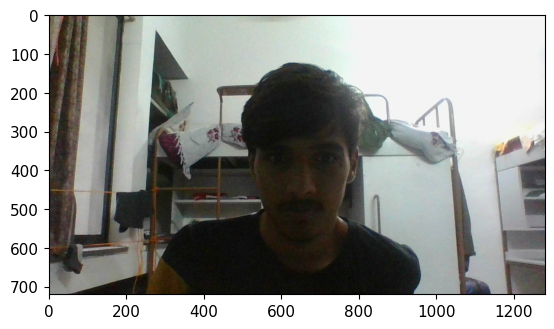

In [46]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [48]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()